# Wyscout: Analysis of Denmark - Slovenia in Qualifier"

In [33]:
%load_ext autoreload
%autoreload 2

# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
import zipfile
from pathlib import Path
import os
import sys
from IPython.display import display

# specfic soccer analysis packages
from mplsoccer import Pitch, Sbopen, VerticalPitch

# load custom functions
from src.visualization import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [34]:
match_id = "5414302"
df_events = pd.read_csv(f"./results/wyscout/{match_id}_df_events.csv", index_col=0)

pitch_length = 120
pitch_width = 80

### Interception

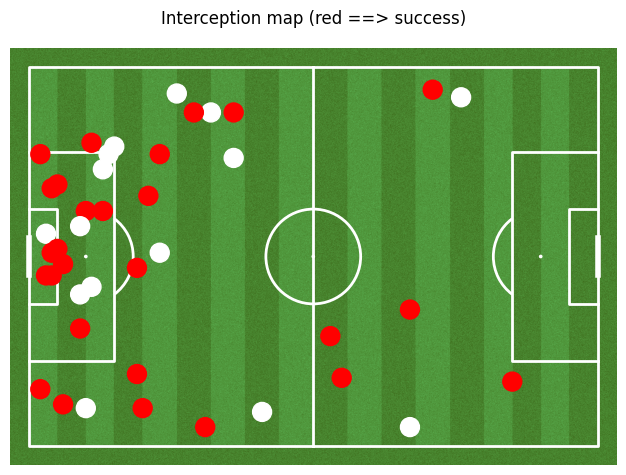

In [35]:
interceptions = df_events[df_events["type.primary"].str.contains('interception')]

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)

fig, ax = pitch.draw()

for i,shot in interceptions.iterrows():
    #get the information
    x=shot['location.x']
    y=shot['location.y']
    goal=shot['shot.isGoal']
    team_name=shot['team.name']
    #set circlesize
    circleSize=2
    color = "red"
    if 'loss' in shot['type.secondary']:
        color = "white"
    #plot England
    if (team_name!='Denmark'):
        shotCircle=plt.Circle((x/100.0 * pitch_length, y/100.0 * pitch_width),circleSize,color=color)
        #plt.text(x/100.0 * pitch_length-4, y/100.0 * pitch_width - 4,shot['player.name'])
        ax.add_patch(shotCircle)

#set title
fig.suptitle("Interception map (red ==> success)", fontsize = 12)
plt.savefig("plots/interception_map.png", dpi=400)
plt.show()

### Duels

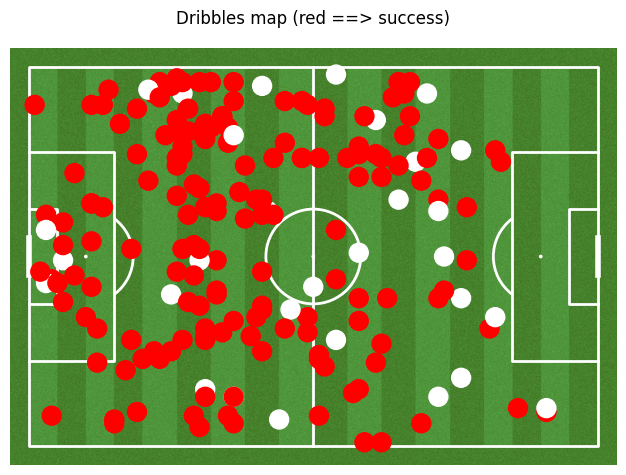

In [36]:
duels = df_events[df_events["type.primary"].str.contains('duel')]

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)

fig, ax = pitch.draw()

for i,shot in duels.iterrows():
    #get the information
    x=shot['location.x']
    y=shot['location.y']
    goal=shot['shot.isGoal']
    team_name=shot['team.name']
    #set circlesize
    circleSize=2
    color = "red"
    if 'loss' in shot['type.secondary']:
        color = "white"
    #plot England
    if (team_name!='Denmark'):
        shotCircle=plt.Circle((x/100.0 * pitch_length, y/100.0 * pitch_width),circleSize,color=color)
        #plt.text(x/100.0 * pitch_length-4, y/100.0 * pitch_width - 4,shot['player.name'])
        ax.add_patch(shotCircle)

#set title
fig.suptitle("Dribbles map (red ==> success)", fontsize = 12)
plt.savefig("plots/duels_map.png", dpi=400)
plt.show()

### Long passes

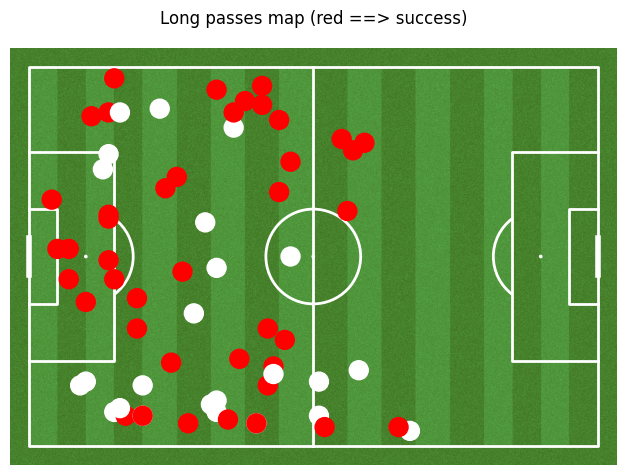

In [37]:
long_passes = df_events[df_events["type.secondary"].str.contains('long_pass')]

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)

fig, ax = pitch.draw()

for i,shot in long_passes.iterrows():
    #get the information
    x=shot['location.x']
    y=shot['location.y']
    goal=shot['shot.isGoal']
    team_name=shot['team.name']
    #set circlesize
    circleSize=2
    color = "red"
    if 'loss' in shot['type.secondary']:
        color = "white"
    #plot England
    if (team_name!='Denmark'):
        shotCircle=plt.Circle((x/100.0 * pitch_length, y/100.0 * pitch_width),circleSize,color=color)
        #plt.text(x/100.0 * pitch_length-4, y/100.0 * pitch_width - 4,shot['player.name'])
        ax.add_patch(shotCircle)

#set title
fig.suptitle("Long passes map (red ==> success)", fontsize = 12)
plt.savefig("plots/long_passes_map.png", dpi=400)
plt.show()

### Cross map

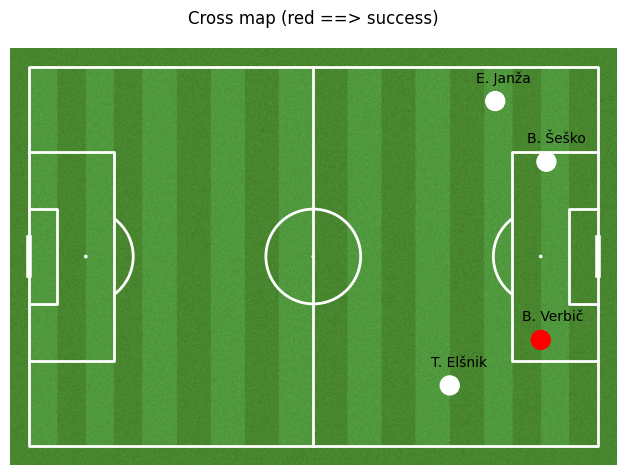

In [38]:
crosses = df_events[df_events["type.secondary"].str.contains('cross')]

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

for i,shot in crosses.iterrows():
    #get the information
    x=shot['location.x']
    y=shot['location.y']
    goal=shot['shot.isGoal']
    team_name=shot['team.name']
    #set circlesize
    circleSize=2
    color = "red"
    if 'loss' in shot['type.secondary']:
        color = "white"
    #plot England
    if (team_name!='Denmark'):
        shotCircle=plt.Circle((x/100.0 * pitch_length, y/100.0 * pitch_width),circleSize,color=color)
        plt.text(x/100.0 * pitch_length-4, y/100.0 * pitch_width - 4,shot['player.name'])
        ax.add_patch(shotCircle)

#set title
fig.suptitle("Cross map (red ==> success)", fontsize = 12)
plt.savefig("plots/crosses_map.png", dpi=400)
plt.show()

### Shots map

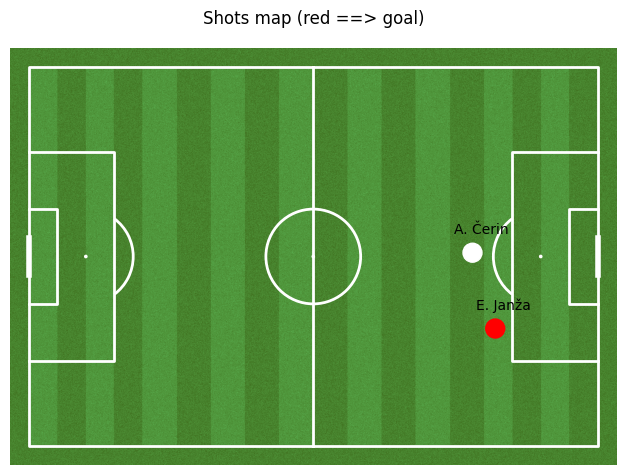

In [39]:
shots = df_events[~df_events["shot.isGoal"].isna()]

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

for i,shot in shots.iterrows():
    #get the information
    x=shot['location.x']
    y=shot['location.y']
    goal=shot['shot.isGoal']
    team_name=shot['team.name']
    #set circlesize
    circleSize=2
    #plot England
    if (team_name!='Denmark'):
        color = "white"
        if goal:
            color = "red"

        shotCircle=plt.Circle((x/100.0 * pitch_length, y/100.0 * pitch_width),circleSize,color=color)
        plt.text(x/100.0 * pitch_length-4, y/100.0 * pitch_width - 4,shot['player.name'])
        ax.add_patch(shotCircle)

#set title
fig.suptitle("Shots map (red ==> goal)", fontsize = 12)
plt.savefig("plots/shots_map.png", dpi=400)
plt.show()

### Fouls

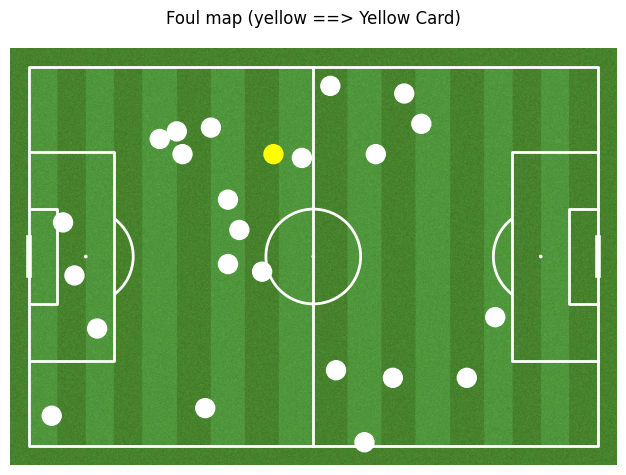

In [40]:
fouls = df_events[df_events["type.secondary"].str.contains('foul')]

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

for i,shot in fouls.iterrows():
    #get the information
    x=shot['location.x']
    y=shot['location.y']
    goal=shot['shot.isGoal']
    team_name=shot['team.name']
    #set circlesize
    circleSize=2
    color = "white"

    if 'yellow_card' in shot['type.secondary']:
        color = "yellow"

    #plot England
    if (team_name!='Denmark'):
        shotCircle=plt.Circle((x/100.0 * pitch_length, y/100.0 * pitch_width),circleSize,color=color)
        ax.add_patch(shotCircle)

#set title
fig.suptitle("Foul map (yellow ==> Yellow Card)", fontsize = 12)
plt.savefig("plots/foul_map.png", dpi=400)
plt.show()